In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [339]:
players = pd.read_csv('data/2017.csv')
players.drop(0,inplace=True)

players['Salary'] = players['Salary'].replace('[\$,]','',regex=True).fillna(535000).astype(int)
players['Name'].replace('[*#\\\\].*','',regex=True, inplace=True)
players['PA'].fillna(0)
players['Salary per PA'] = players['Salary'] / players['PA']
players['Is Pitcher'] = players['Pos Summary'].apply(lambda x: str(x).find('1') >= 0)
players.reset_index(drop=True,inplace=True)
# print(players.dtypes)

players.head()

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,...,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Salary per PA,Is Pitcher
0,1.0,Fernando Abad,31.0,BOS,4.0,0.0,0.0,0.0,0.0,0.0,...,0.500,0.500,0.0,0.0,0.0,2000000,Traded,1,inf,True
1,2.0,Jose Abreu,30.0,CHW,156.0,675.0,34.0,1.0,-2.0,0.0,...,0.515,0.514,4.7,-0.9,47.0,10825000,Amateur Free Agent,*3D,1.603704e+04,False
2,3.0,Cristhian Adames,25.0,COL,12.0,14.0,-4.0,0.0,0.0,-1.0,...,0.462,0.497,-0.3,-0.1,-3.0,540000,Amateur Free Agent,/346,3.857143e+04,False
3,4.0,Austin Adams,26.0,WSN,6.0,0.0,0.0,0.0,0.0,0.0,...,0.500,0.500,0.0,0.0,0.0,535000,Traded,/1,inf,True
4,5.0,Lane Adams,27.0,ATL,85.0,122.0,2.0,2.0,0.0,-2.0,...,0.501,0.501,0.7,-0.3,7.0,535000,Free Agency,78/9,4.385246e+03,False


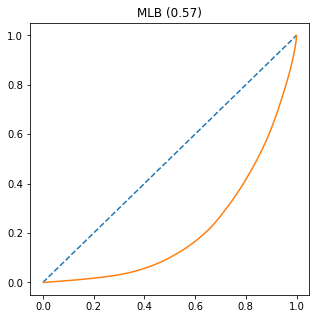

In [336]:
df = players[(players['Is Pitcher']==False)
             & (players['PA'] > 0)].sort_values('Salary per PA').copy()

pa = np.zeros(df.shape[0]+1)
pa[1:] = np.cumsum(df['PA'])/df['PA'].sum()
salary = np.zeros(df.shape[0]+1)
salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5

plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],ls='--')
plt.plot(np.cumsum(df['PA'])/df['PA'].sum(),
         np.cumsum(df['Salary']) / df['Salary'].sum())
plt.title('MLB (%0.2f)' % (gini))
plt.show()

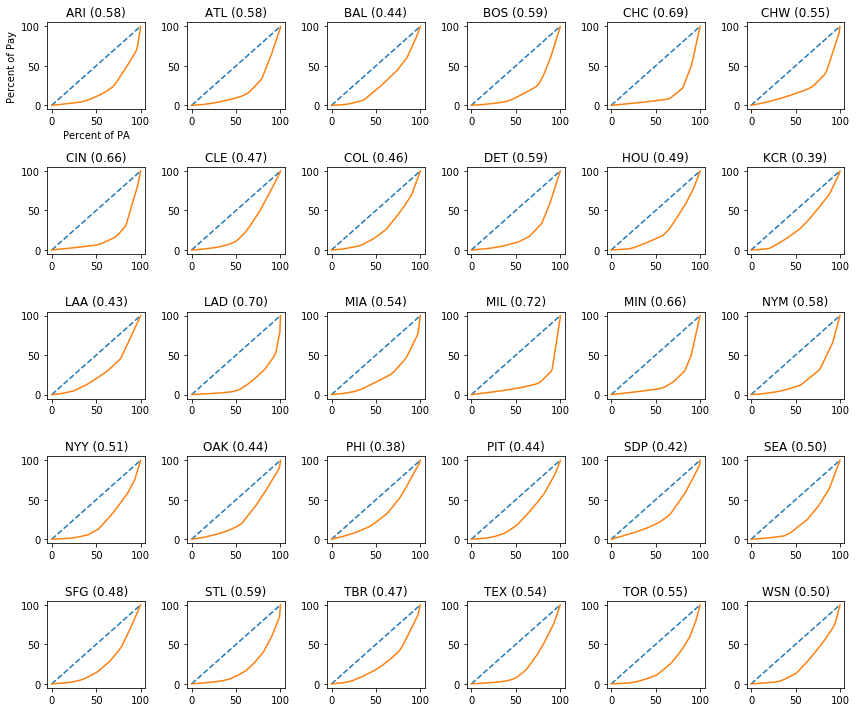

In [337]:
plt.figure(figsize=(12,10))

for i,tm in enumerate(players['Tm'].sort_values().unique()[2:]):
    df = players[(players['Tm']==tm) 
                 & (players['Is Pitcher']==False)
                 & (players['PA'] > 0)].sort_values('Salary per PA').copy()
    
    pa = np.zeros(df.shape[0]+1)
    pa[1:] = np.cumsum(df['PA'])/df['PA'].sum()
    salary = np.zeros(df.shape[0]+1)
    salary[1:] = np.cumsum(df['Salary']) / df['Salary'].sum()
    gini = 1 - ((salary[1:]+ salary[:-1])/2 * (pa[1:]-pa[:-1])).sum()/0.5
    
    plt.subplot(5,6,i+1)
    plt.plot([0,100],[0,100],ls='--')
    plt.plot(pa*100,salary*100,
             #where='post',
             label=tm)
    if(i==0):
        plt.xlabel('Percent of PA')
        plt.ylabel('Percent of Pay')
    plt.title('%s (%0.2f)' % (tm,gini))

plt.tight_layout()
plt.show()
